In [19]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [20]:
BM = ceo.KarhunenLoeve(N_MODE=1,N_SURF=7)

# Regular grid

In [21]:
b = BM.load()

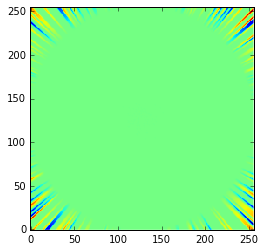

In [22]:
plt.imshow(np.reshape(b.host(),(256,256)),interpolation='none',origin='lower')

In [23]:
NI = 501
di = 8.362/(NI-1)
tid = ceo.StopWatch()

In [24]:
def bending_modes_reg(x,N=167):
    di = 8.362/(N-1)    
    tid.tic()
    (B,dBdx,dBdy) = BM.interpolate(N,di,x,grid='regular')
    tid.toc()

    print tid.elapsedTime
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(10,10)
    h = ax[0].imshow(B.host(),interpolation='none',origin='lower')
    ax[1].imshow(dBdx.host(),interpolation='none',origin='lower')
    ax[2].imshow(dBdy.host(),interpolation='none',origin='lower')

0.684415996075


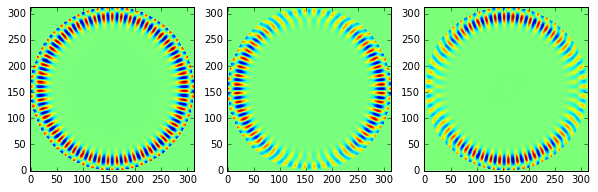

In [31]:
interact(bending_modes_reg,x=widgets.IntSlider(min=1,max=1000,step=1,continuous_update=False),
         N=widgets.IntSlider(min=32,max=501,step=1,continuous_update=False))

# GMT

In [1]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
gmt = ceo.GMT_MX(M2_mirror_modes=u'Karhunen-Loeve',M2_N_MODE=1000)

In [3]:
src = ceo.Source("R",rays_box_sampling=401,rays_box_size=25.5,rays_origin=[0,0,25])

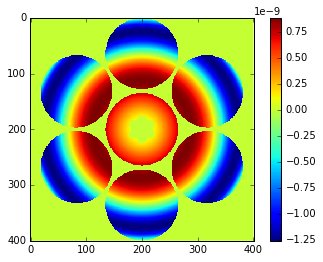

In [4]:
src.reset()
gmt.reset()
gmt.propagate(src)
plt.imshow(src.phase.host(),interpolation='none')
plt.colorbar()

In [5]:
gmt.M2.modes.a.shape

(7, 1000)

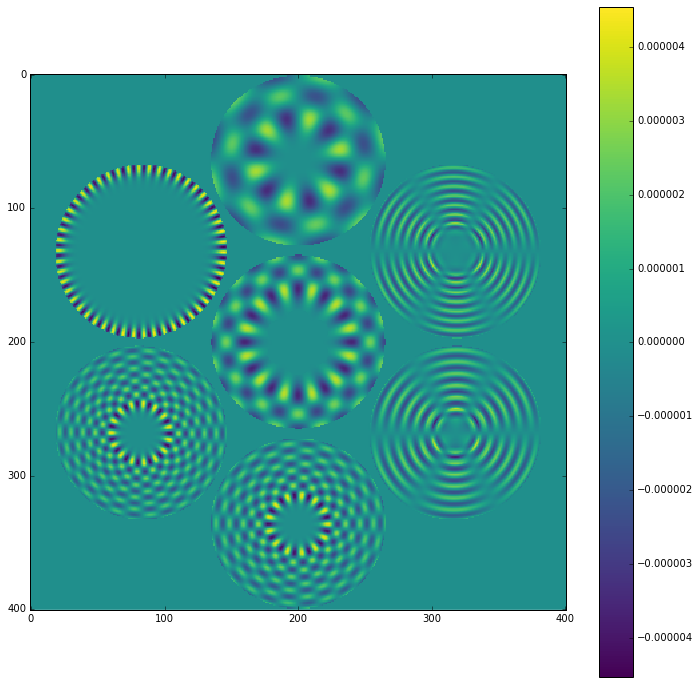

In [25]:
src.reset()
gmt.reset()
gmt.M2.modes.reset()
for k in range(7):
    gmt.M2.modes.a[k,np.random.randint(0,999)]=1e-6
gmt.M2.modes.update()
gmt.propagate(src)
fig = plt.figure()
fig.set_size_inches(12,12)
plt.imshow(src.phase.host(),interpolation='none',cmap='viridis')
plt.colorbar()